In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('table.csv',sep=';',index_col='index')
df.iloc[[1]]

,2021-03-16 04:01:00,2021-03-16 08:01:00,2021-03-16 12:01:00,2021-03-16 16:01:00,2021-03-16 20:01:00,2021-03-17 00:01:00,2021-03-17 04:01:00,2021-03-17 08:01:00,2021-03-17 12:01:00,2021-03-17 16:01:00,2021-03-17 20:01:00,2021-03-18 00:01:00,2021-03-18 04:01:00,2021-03-18 08:01:00,2021-03-18 12:01:00,2021-03-18 16:01:00,2021-03-18 20:01:00,2021-03-19 00:01:00,2021-03-19 04:01:00,2021-03-19 08:01:00,2021-03-19 12:01:00,2021-03-19 16:01:00,2021-03-19 20:01:00,2021-03-20 00:01:00,2021-03-20 04:01:00,2021-03-20 08:01:00,2021-03-20 12:01:00,2021-03-20 16:01:00,2021-03-20 20:01:00,2021-03-21 00:01:00,2021-03-21 04:01:00,2021-03-21 08:01:00,2021-03-21 12:01:00,2021-03-21 16:01:00,2021-03-21 20:01:00,2021-03-22 00:01:00,2021-03-22 04:01:00,2021-03-22 08:01:00,2021-03-22 12:01:00,2021-03-22 16:01:00,...,2021-05-13 20:01:00,2021-05-14 00:01:00,2021-05-14 04:01:00,2021-05-14 08:01:00,2021-05-14 12:01:00,2021-05-14 16:01:00,2021-05-14 20:01:00,2021-05-15 00:01:00,2021-05-15 04:01:00,2021-05-15 08:01:00,2021-05-15 12:01:00,2021-05-15 16:01:00,2021-05-15 20:01:00,2021-05-16 00:01:00,2021-05-16 04:01:00,2021-05-16 08:01:00,2021-05-16 12:01:00,2021-05-16 16:01:00,2021-05-16 20:01:00,2021-05-17 00:01:00,2021-05-17 04:01:00,2021-05-17 08:01:00,2021-05-17 12:01:00,2021-05-17 16:01:00,2021-05-17 20:01:00,2021-05-18 00:01:00,2021-05-18 04:01:00,2021-05-18 08:01:00,2021-05-18 12:01:00,2021-05-18 16:01:00,2021-05-18 20:01:00,2021-05-19 00:01:00,2021-05-19 04:01:00,2021-05-19 08:01:00,2021-05-19 12:01:00,2021-05-19 16:01:00,2021-05-19 20:01:00,2021-05-20 00:01:00,2021-05-20 04:01:00,2021-05-20 08:01:00
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951706->950101,17.0,0.0,0.0,7.0,5.0,0.0,10.0,5.0,14.0,14.0,4.0,1.0,2.0,0.0,13.0,6.0,0.0,2.0,10.0,0.0,9.0,9.0,3.0,0.0,17.0,9.0,1.0,12.0,2.0,1.0,15.0,16.0,0.0,2.0,0.0,4.0,0.0,13.0,0.0,12.0,...,1.0,0.0,3.0,0.0,13.0,16.0,4.0,0.0,3.0,5.0,0.0,0.0,15.0,1.0,11.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,2.0,12.0,2.0,9.0,8.0,0.0,11.0,4.0,0.0,17.0,2.0,1.0,16.0,0.0,0,0.0


In [ ]:
# data = hstack([a, b, c, d, e])
data = df.to_numpy()[0:1].T
data.shape

(392, 1)

(389, 3, 1) (389, 1, 1)
Epoch 1/50
10/10 [==============================] - 3s 96ms/step - loss: 1.8942 - val_loss: 1.5185
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 2.0698 - val_loss: 1.5177
Epoch 3/50
10/10 [==============================] - 0s 13ms/step - loss: 1.8963 - val_loss: 1.5176
Epoch 4/50
10/10 [==============================] - 0s 13ms/step - loss: 1.9407 - val_loss: 1.5172
Epoch 5/50
10/10 [==============================] - 0s 13ms/step - loss: 1.5706 - val_loss: 1.5175
Epoch 6/50
10/10 [==============================] - 0s 13ms/step - loss: 1.9364 - val_loss: 1.5176
Epoch 7/50
10/10 [==============================] - 0s 13ms/step - loss: 2.0447 - val_loss: 1.5170
Epoch 8/50
10/10 [==============================] - 0s 14ms/step - loss: 1.8654 - val_loss: 1.5176
Epoch 9/50
10/10 [==============================] - 0s 13ms/step - loss: 1.6540 - val_loss: 1.5172
Epoch 10/50
10/10 [==============================] - 0s 13ms/step - loss: 1.7678 - va

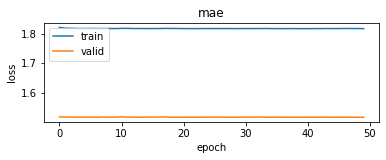

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import matplotlib.pyplot as plt  
import numpy as np
 
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		if out_end_ix > len(sequences):
			break
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

q = np.array([x*np.pi/180.0 for x in range(0, 400)])
d_0 = 100*np.sin(q + np.cos(q) + np.sin(q)).reshape([-1, 1]) + 100
d_1 = 100*np.sin(q + np.sin(q) + np.sin(q)).reshape([-1, 1]) + 100

dataset = hstack([d_0, d_1])
n_steps_in, n_steps_out = 3, 1

X_o, y_o = split_sequences(data, n_steps_in, n_steps_out)
# X = (X_o - X_o.min()) / (X_o.max() - X_o.min())
# y = (y_o - y_o.min()) / (y_o.max() - y_o.min())
X, y = X_o, y_o
print(X.shape, y.shape)
X_train, y_train = X[:300], y[:300]
X_valid, y_valid = X[300:], y[300:]
 
n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mae')
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, verbose=1)
   
plt.subplot(211)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('mae')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='upper left')  
 
plt.show()  

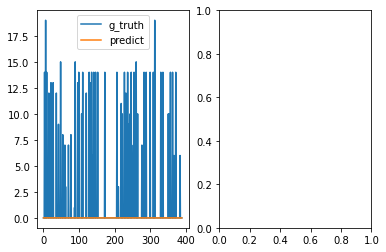

In [ ]:
y_predt = model.predict(X_o)

fig, ax = plt.subplots(nrows=1, ncols=2)

D = 0
# print(y_predt.shape)
# t = y_predt * (y_predt.max() - y_predt.min()) + y_predt.mean()
# y_predt.T.shape
ax[0].plot(y_o.T[D][0])
ax[0].plot(y_predt.T[D][0])
ax[0].legend(['g_truth', 'predict'])
# print(t.T[0][0].shape)
# print(y_o.T[D][0].shape)
# ax[1].plot(y_o.T[0][0])
# ax[1].plot(y_predt_1.T[0][0])
# ax[1].legend(['g_truth', 'predict'])



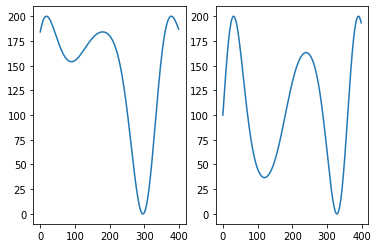

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(d_0)
ax[1].plot(d_1)